In [ ]:
from mingus.core import chords

result = chords.from_shorthand("Cmaj7")

print(result)

In [ ]:
from mingus.core import chords

chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

array_of_notes = []
for chord in chord_progression:
    array_of_notes.extend(chords.from_shorthand(chord))

print(array_of_notes)

In [ ]:
from midiutil import MIDIFile
from mingus.core import chords

chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
OCTAVES = list(range(11))
NOTES_IN_OCTAVE = len(NOTES)

errors = {
    'notes': 'Bad input, please refer this spec-\n'
}


def swap_accidentals(note):
    if note == 'Db':
        return 'C#'
    if note == 'D#':
        return 'Eb'
    if note == 'E#':
        return 'F'
    if note == 'Gb':
        return 'F#'
    if note == 'G#':
        return 'Ab'
    if note == 'A#':
        return 'Bb'
    if note == 'B#':
        return 'C'

    return note


def note_to_number(note: str, octave: int) -> int:
    note = swap_accidentals(note)
    assert note in NOTES, errors['notes']
    assert octave in OCTAVES, errors['notes']

    note = NOTES.index(note)
    note += (NOTES_IN_OCTAVE * octave)

    assert 0 <= note <= 127, errors['notes']

    return note


array_of_notes = []
for chord in chord_progression:
    array_of_notes.extend(chords.from_shorthand(chord))

array_of_note_numbers = []
for note in array_of_notes:
    OCTAVE = 4
    array_of_note_numbers.append(note_to_number(note, OCTAVE))

track = 0
channel = 0
time = 0  # In beats
duration = 1  # In beats
tempo = 120  # In BPM
volume = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
# automatically)
MyMIDI.addTempo(track, time, tempo)

for i, pitch in enumerate(array_of_note_numbers):
    MyMIDI.addNote(track, channel, pitch, time + i, duration, volume)

with open("pure-edm-fire-arpeggio.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [ ]:
from midiutil import MIDIFile
from mingus.core import chords

chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
OCTAVES = list(range(11))
NOTES_IN_OCTAVE = len(NOTES)

errors = {
    'notes': 'Bad input, please refer this spec-\n'
}


def swap_accidentals(note):
    if note == 'Db':
        return 'C#'
    if note == 'D#':
        return 'Eb'
    if note == 'E#':
        return 'F'
    if note == 'Gb':
        return 'F#'
    if note == 'G#':
        return 'Ab'
    if note == 'A#':
        return 'Bb'
    if note == 'B#':
        return 'C'

    return note


def note_to_number(note: str, octave: int) -> int:
    note = swap_accidentals(note)
    assert note in NOTES, errors['notes']
    assert octave in OCTAVES, errors['notes']

    note = NOTES.index(note)
    note += (NOTES_IN_OCTAVE * octave)

    assert 0 <= note <= 127, errors['notes']

    return note


array_of_notes = []
for chord in chord_progression:
    array_of_notes.append(chords.from_shorthand(chord)[0])

array_of_note_numbers = []
for note in array_of_notes:
    OCTAVE = 3
    array_of_note_numbers.append(note_to_number(note, OCTAVE))

track = 0
channel = 0
time = 0  # In beats
duration = 1  # In beats
tempo = 120  # In BPM
volume = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
# automatically)
MyMIDI.addTempo(track, time, tempo)

for i, pitch in enumerate(array_of_note_numbers):
    MyMIDI.addNote(track, channel, pitch, time + (i*4), duration, volume)

with open("pure-edm-fire-bass.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [18]:
from music21 import *

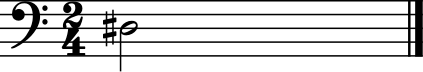

In [19]:
n = note.Note("D#3")
n.duration.type = "half"
n.show()

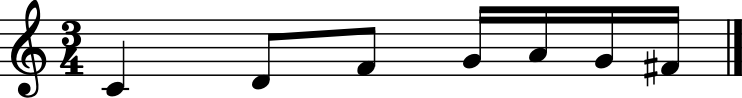

In [20]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

In [21]:
littleMelody.show('midi')

In [22]:
import music21 as ms21

In [25]:
ms21.note

<module 'music21.note' from '/Users/ignacybartnik/Documents/youtube_midi_2_sheet_music/.conda/lib/python3.10/site-packages/music21/note.py'>

In [26]:
f = note.Note("F5")

In [27]:
f

<music21.note.Note F>

In [28]:
f.name

'F'

In [29]:
f.octave

5

In [33]:
f.pitch.frequency

698.456462866008

In [34]:
f.pitch.pitchClassString

'5'

In [35]:
f.octave == 5

True

In [36]:
f.pitch.pitchClassString == 5

False

In [37]:
bflat = note.Note("B-2")

In [38]:
bflat.pitch.accidental

<music21.pitch.Accidental flat>

In [39]:
acc = bflat.pitch.accidental

In [40]:
acc.alter

-1.0

In [41]:
bflat.pitch.accidental.alter

-1.0

In [42]:
acc.displayLocation

'normal'

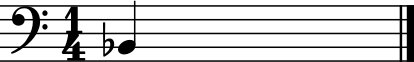

In [43]:
bflat.show()

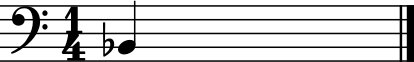

In [44]:
acc.displayLocation = 'above'
bflat.show()

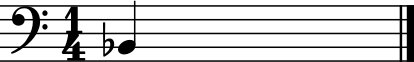

In [45]:
bflat.pitch.accidental.displayLocation = "above"
bflat.show()

In [46]:
f.show('midi')

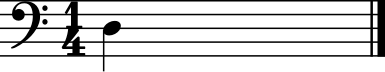

In [48]:
d = bflat.transpose("M3")
d.show()

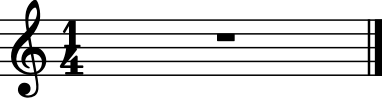

In [50]:
r = note.Rest()
r.show()

In [51]:
p1 = pitch.Pitch('b-4')

In [52]:
halfDuration = duration.Duration('half')

In [53]:
halfDuration

<music21.duration.Duration 2.0>

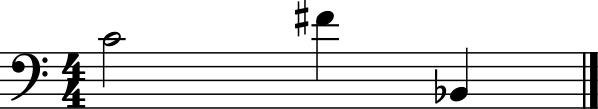

In [59]:
stream1 = stream.Stream()
note1 = note.Note("C4")
note2 = note.Note("F#4")
note1.duration.type = "half"
note1.duration.quarterLength
note3 = note.Note("B-2")
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)
stream1.show()

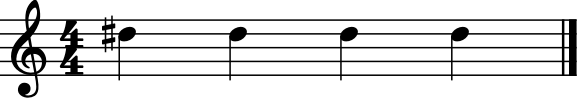

In [58]:
stream2 = stream.Stream()
n3 = note.Note('D#5')  # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

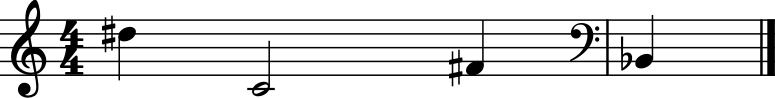

In [61]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)
biggerStream.show()